In [43]:
import akshare as ak

In [44]:
sw_index_spot_df = ak.sw_index_spot()
print(sw_index_spot_df)

      指数代码  指数名称       昨收盘       今开盘             成交额       最高价       最低价  \
0   801010  农林牧渔   4374.91   4371.87   41047558658.0   4371.92   4243.65   
1   801020    采掘   2507.44   2512.71   14863268785.0   2523.99   2478.31   
2   801030    化工   3864.28   3867.74   71236316699.0   3875.86   3801.02   
3   801040    钢铁   2325.36   2314.35    8255089403.0   2328.85   2276.03   
4   801050  有色金属   4537.46   4574.75   76807328716.0   4574.81   4365.76   
5   801080    电子   4931.92   4942.01  117778334358.0   4970.61   4914.86   
6   801110  家用电器  10733.27  10695.08   18464629861.0  10783.61  10551.95   
7   801120  食品饮料  31514.54  31508.48   86354596853.0  31638.43  30323.72   
8   801130  纺织服装   1704.00   1698.17    6435858313.0   1714.81   1672.36   
9   801140  轻工制造   2645.28   2645.52   16304458145.0   2677.17   2615.59   
10  801150  医药生物  12415.75  12424.56   87593676008.0  12524.58  12321.80   
11  801160  公用事业   1961.69   1955.55   22048917097.0   1977.62   1943.58   
12  801170  

In [45]:
print(ak.sw_index_daily_indicator(index_code="801150",start_date="2020-01-01", end_date="2020-12-31", data_type="Week"))

   index_code index_name       date     close  volume chg_pct turn_rate  \
0      801150       医药生物 2020-12-25  12037.96  150.89    1.10    1.0979   
1      801150       医药生物 2020-12-18  11907.55  136.16    4.25    1.2750   
2      801150       医药生物 2020-12-11  11422.07  131.71   -2.14    1.4796   
3      801150       医药生物 2020-12-04  11671.55  125.90    5.98    1.1923   
4      801150       医药生物 2020-11-27  11012.48  115.04   -2.92    0.8737   
5      801150       医药生物 2020-11-20  11343.35  118.24   -1.43    0.9841   
6      801150       医药生物 2020-11-13  11507.51  143.71   -1.23    0.9887   
7      801150       医药生物 2020-11-06  11650.76  142.03   -1.36    1.4498   
8      801150       医药生物 2020-10-30  11810.92  140.07    2.79    1.5464   
9      801150       医药生物 2020-10-23  11490.44  143.42   -6.24    1.2179   
10     801150       医药生物 2020-10-16  12254.87  168.80    3.23    1.5626   
11     801150       医药生物 2020-10-09  11871.21   29.55    2.86    1.3863   
12     801150       医药生物 

In [46]:
import pandas as pd

tmp = pd.DataFrame()

for code in sw_index_spot_df['指数代码']:
    sw_index_df = ak.sw_index_daily_indicator(index_code=code,start_date="2019-12-31", end_date="2021-01-01", data_type="Week")
    init_price = float(sw_index_df.iloc[-1].at['close'])
    sw_index_df['relate_price'] = sw_index_df['close'].astype('float').apply(lambda x: (x-init_price)/init_price)
    tmp[sw_index_df.iloc[-1].at['index_name']] = sw_index_df['relate_price']
    # tmp.set_index(sw_index_df['date'], inplace=True)
tmp = tmp.iloc[::-1].reset_index(drop=True).T

In [47]:
tmp = tmp.sort_values(by=49, ascending=False)

print(tmp)

       0         1         2         3         4         5         6   \
电气设备  0.0  0.025393  0.022400  0.024051  0.025447  0.047757  0.136217   
休闲服务  0.0  0.028488 -0.005563 -0.103855 -0.133331 -0.126101 -0.066832   
食品饮料  0.0  0.030643  0.037997 -0.027384 -0.043747 -0.036885  0.002293   
医药生物  0.0  0.027917  0.043994  0.047390  0.109994  0.090619  0.108523   
国防军工  0.0  0.012430  0.006241 -0.003875 -0.038498 -0.027174  0.091414   
汽车    0.0  0.028449  0.044299 -0.001896 -0.041798 -0.014245  0.076985   
化工    0.0  0.004838  0.011948 -0.021704 -0.038287 -0.020301  0.042628   
有色金属  0.0  0.006692  0.007973 -0.037753 -0.093686  0.001134  0.040076   
电子    0.0  0.031946  0.059168  0.091835  0.064410  0.112519  0.261554   
机械设备  0.0  0.009834  0.002838 -0.032859 -0.077114 -0.043278  0.023835   
家用电器  0.0  0.031639  0.022636 -0.038302 -0.065809 -0.047156 -0.023169   
建筑材料  0.0  0.007267 -0.010195 -0.065635 -0.110594 -0.033801 -0.006095   
轻工制造  0.0  0.023572  0.024410 -0.026395 -0.071219 -

<Figure size 432x288 with 0 Axes>

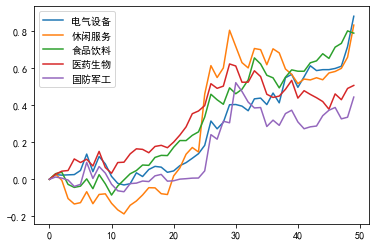

In [48]:
import matplotlib.pyplot as plt

sw_index_spot_df = ak.sw_index_spot()

plt.figure()
tmp.head(5).T.plot()
plt.legend(loc='best')
